In [1]:
import os
import sys 

# import local libraries 
# path of local project 
folder_path ='/home/yaga/Documents/GitHub/mfpml'
sys.path.insert(0,folder_path)

# Test single fidelity samplers 

In [2]:
# import the mfpml package 
from mfpml.design_of_experiment.sf_samplers import * 
from mfpml.design_of_experiment.space import DesignSpace 

# define the design space 
space = DesignSpace(names=['x1', 'x2'],
                    low_bound=[0.0, 0.0],
                    high_bound=[1.0, 1.0]) 
# output the deisgn space in a dict format 
design_space = space.design_space 
print(f'dict format: \n {design_space}')
# output the design in a array format 
input_domain = space.input_domain
print(f'array format: \n {input_domain}')


dict format: 
 {'x1': [0.0, 1.0], 'x2': [0.0, 1.0]}
array format: 
 [[0. 1.]
 [0. 1.]]


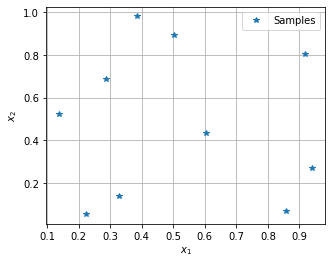

In [4]:
# test the sf SobolSequence sampler  
sampler = SobolSequence(design_space=design_space,
                        seed=12)
samples = sampler.get_samples(num_samples=10)

sampler.plot_samples(fig_size=(5,4))

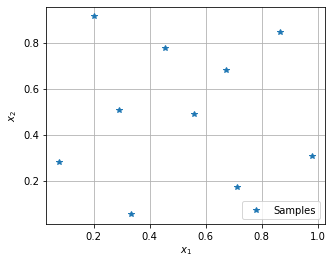

In [5]:
# test the sf LatinHyperCube sampler  
sampler = LatinHyperCube(design_space=design_space,
                        seed=12)
samples = sampler.get_samples(num_samples=10)

sampler.plot_samples()

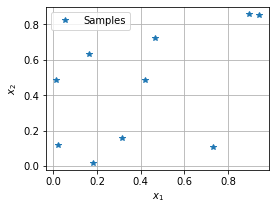

In [6]:
# test the sf Random sampler  
sampler = RandomSampler(design_space=design_space,
                        seed=11)
samples = sampler.get_samples(num_samples=10)

sampler.plot_samples(fig_size=(4,3))

# Multi-fidelity samplers 

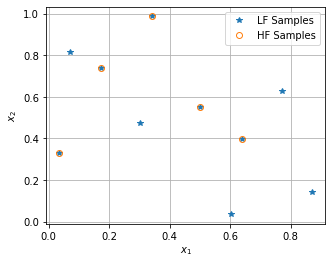

In [7]:
# import the mf samplers 
# mf sobol sequence with nested sampling 
from mfpml.design_of_experiment.mf_samplers import LatinHyperCube, SobolSequence
mf_sampler = SobolSequence(design_space=design_space,
                            seed=10,
                            nested=True)
samples = mf_sampler.get_samples(num_lf_samples=10, num_hf_samples=5)

mf_sampler.plot_samples()

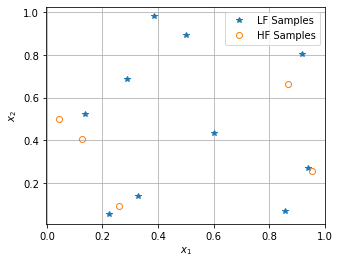

In [8]:
# mf sobol sequence with non-nested sampling 
mf_sampler = SobolSequence(design_space=design_space,
                            seed=12,
                            nested=False)
samples = mf_sampler.get_samples(num_lf_samples=10, num_hf_samples=5)

mf_sampler.plot_samples()

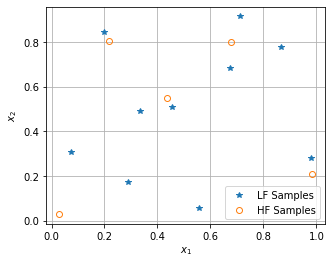

In [9]:
# Latin hpyer cube 
mf_sampler = LatinHyperCube(design_space=design_space,
                            seed=12,
                            nested=False)
samples = mf_sampler.get_samples(num_lf_samples=10, num_hf_samples=5)

mf_sampler.plot_samples(fig_size=(10,8))